# Implement Kaplan-Meier Survival Analysis for Patient Outcomes

In [1]:
import pandas as pd

df = pd.read_csv('survival_data.csv')

In [2]:
# 'Time' (T) and 'Event' (E) (1=event, 0=censored)
T_col = 'Time'
E_col = 'Event'

In [3]:
df_sorted = df.sort_values(by=T_col, ascending=True) # Sort the data by Time

In [4]:
df_agg = df_sorted.groupby(T_col).agg(
    events=(E_col, 'sum'),           # Number of events (d_i)
    total_at_time=(E_col, 'count')   # Total patients (d_i + c_i) at this time
).reset_index()

In [5]:
total_patients = len(df)
# At_Risk = Total patients - (Cumulative sum of all events/censored before this time)
df_agg['At_Risk'] = total_patients - df_agg['total_at_time'].cumsum().shift(1, fill_value=0)

In [6]:
# Survival Probability S(t_i) = S(t_{i-1}) * (1 - d_i / n_i)
df_agg['Survival_Prob_Change'] = 1 - (df_agg['events'] / df_agg['At_Risk'])
df_agg['Survival_Probability'] = df_agg['Survival_Prob_Change'].cumprod()

In [7]:
start_point = pd.DataFrame({T_col: [0.0], 'Survival_Probability': [1.0]})
survival_curve = pd.concat([start_point, df_agg[[T_col, 'Survival_Probability']]]).reset_index(drop=True)

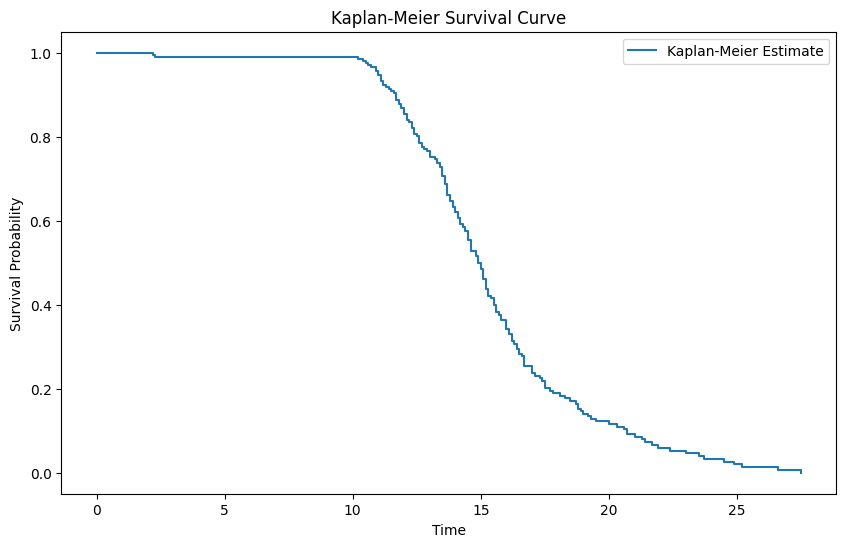

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.step(
    survival_curve[T_col],
    survival_curve['Survival_Probability'],
    where='post',
    label='Kaplan-Meier Estimate'
)

plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()